## GET

In [1]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')

In [2]:
res

<Response [200]>

In [3]:
print(dir(res))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [5]:
#res.text

## HTTP 狀態碼
- https://zh.wikipedia.org/zh-tw/HTTP%E7%8A%B6%E6%80%81%E7%A0%81

## POST

In [8]:
import requests
url = 'https://www.thsrc.com.tw/tw/TimeTable/SearchResult'
payload = {
'StartStation':'977abb69-413a-4ccf-a109-0272c24fd490',
'EndStation':'a7a04c89-900b-4798-95a3-c01c455622f4',
'SearchDate':'2018/01/08',
'SearchTime':'10:30',
'SearchWay':'DepartureInMandarin'
    
}
res = requests.post(url, data = payload)
res

<Response [200]>

In [16]:
print(type(res))
#res.text

<class 'requests.models.Response'>


## 台銀匯率
- http://rate.bot.com.tw/xrt?Lang=zh-TW

In [12]:
import requests
res = requests.get('http://rate.bot.com.tw/xrt?Lang=zh-TW')
#res.text

## 使用BeautifulSoup4

In [14]:
from bs4 import BeautifulSoup 
html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
</html>
'''

soup = BeautifulSoup(html_sample, 'html.parser')

In [15]:
soup.text

'\n\n\nHello World\nThis is link1\nThis is link2\n\n\n'

In [17]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [19]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [21]:
type(soup.select_one('h1'))

bs4.element.Tag

In [23]:
soup.select_one('h1').text

'Hello World'

In [25]:
soup.select_one('a')

<a class="link" href="#">This is link1</a>

In [27]:
soup.select_one('a').text

'This is link1'

In [29]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [31]:
for a in soup.select('a'):
    print(a.text)

This is link1
This is link2


In [33]:
soup.select('h1')

[<h1 id="title">Hello World</h1>]

In [34]:
soup.select('h1')[0]

<h1 id="title">Hello World</h1>

In [35]:
soup.select('h1')[0].text

'Hello World'

In [37]:
# id => #
soup.select_one('#title')
soup.select_one('#title').text

'Hello World'

In [39]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [42]:
for ele in soup.select('.link'):
    #print(ele)
    #print(ele.text)
    print(ele.get('href'))
    

#
# link2


In [47]:
s = '<a href="http://www.largitdata.com" qoo=123 abc=qwe>An Example </a>'
soup2 = BeautifulSoup(s, 'html.parser')
soup2.select_one('a').get('qoo')

'123'

In [48]:
print(html_sample)

 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
</html>



In [50]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [52]:
soup.select_one('body h1')

<h1 id="title">Hello World</h1>

In [53]:
soup.select_one('body > h1')

<h1 id="title">Hello World</h1>

In [55]:
soup.select_one('body #title')

<h1 id="title">Hello World</h1>

In [56]:
soup.select_one('body h1#title')

<h1 id="title">Hello World</h1>

In [58]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [60]:
soup.select('body a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [61]:
soup.select('body a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [62]:
soup.select('body .link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

## 資料搜集實務

In [63]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')

In [65]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [80]:
for news in soup.select('.rtddt a'):
    # print(news)
    title    = news.select_one('h1').text
    #title    = news.select('h1')[0].text
    #print(title)
    category = news.select_one('h2').text
    dt       = news.select_one('time').text
    url      = news.get('href')
    print(title, category, dt, url)
    print('======================================')

【金球獎】《淑女鳥》23歲瑟夏羅南首封音... 娛樂 11:36 https://tw.entertainment.appledaily.com/realtime/20180108/1273502/
明德水庫蓄水創全國最低　1期稻作恐休耕 生活 11:35 https://tw.news.appledaily.com/life/realtime/20180108/1274128/
8槍逮毒販　起獲特種部隊用M4A1步槍 社會 11:35 https://tw.news.appledaily.com/local/realtime/20180108/1274149/
溪湖鐵皮屋火警　幸無人傷亡 社會 11:31 https://tw.news.appledaily.com/local/realtime/20180108/1274142/
【一起讀判決】從陳喬恩酒駕案　了解具保6... 社會 11:31 https://tw.news.appledaily.com/local/realtime/20180108/1274115/
宏普12月營收衝　華友聯2017營收增7... 地產 11:31 https://tw.finance.appledaily.com/realtime/20180108/1274138/
寒流要來了　圓仔、國王企鵝爽過冬 動物 11:30 https://tw.lifestyle.appledaily.com/animal/realtime/20180108/1274133/
【金球得主不斷更新】《水底情深》奪2獎　...(16343) 娛樂 11:27 https://tw.entertainment.appledaily.com/realtime/20180108/1273509/
【有片】陳偉殷因傷表現不如預期　馬林魚近...(10047) 體育 11:27 https://tw.sports.appledaily.com/realtime/20180108/1274026/
【W命案】「死前還被餵毒」　他竟辯小模自... 社會 11:27 https://tw.news.appledaily.com/local/realtime/20180108/1274139/
立院遭拒馬包圍　早餐店老闆娘怒罵：小老百... 政治 11:26 http

## 抓取圖片

In [81]:
import requests
res = requests.get('https://img.appledaily.com.tw/images/thumbnail/other/4c96dd254111d4ffd78a255eca1262f6.jpg')
with open('1.jpg', 'wb') as f:
    f.write(res.content)

## 回顧爬蟲流程

In [82]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')

In [85]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [90]:
for news in soup.select('.rtddt a'):
    title    = news.select_one('h1').text
    category = news.select_one('h2').text
    dt       = news.select_one('time').text
    print(title, category, dt)

挨罵變麻吉　小嫻白住艾力克斯新居 娛樂 13:41
高齡92歲　馬哈迪再拚馬來西亞總理大位 國際 13:41
房市盤整威力超猛　這些社區打回原形 地產 13:39
【全紀錄】NBA今日5場賽事　湖人終止9... 體育 13:36
台股驚驚漲突破10900點關卡　創逾27... 財經 13:34
為了吃零食汪汪狂秀才藝　網友：快給他吃啦(4) 動物 13:33
比特幣挖礦需求　美桀去年營收改寫新高(11) 財經 13:33
【倒楣片】「絕命終結站」是真的　騎士遇怪...(19003) 社會 13:32
不滿政黨法針對統促黨　張安樂要提公投：5...(5240) 社會 13:31
【更新】上空搖下去！直播「送二粒」　粉專...(75503) 生活 13:30
照飛M503的航空業者　民航局：處置做法...(6983) 生活 13:30
趙又廷寵妻無極限　賣DR.WU婚戒來搶鏡(33) 時尚 13:30
【有片】知名高雄烤黑輪老店　沾醬驚見蟲蟲...(91) 生活 13:29
槍擊莿桐公所的是玻璃彈珠？　送刑事局鑑定(106) 社會 13:26
【W命案】「死前還被餵毒」　他竟辯小模自...(19853) 社會 13:22
【護照出包檢討】李大維怒斥同仁：以菁英自...(1444) 政治 13:22
​【不斷更新】勞團搭棚抗議勞基法　600...(13612) 社會 13:20
時力立委凌晨遭趕　因柯Ｐ指示7時前要維持...(384) 生活 13:20
600警護立院　勞團搭起棚架欲長期抗戰 社會 13:20
川普成民主反教材　陸媒：中國人最好遠離此...(490) 國際 13:19
國道奪命夾擊　百萬名車瞬成廢鐵(86952) 社會 13:17
​因應蘋果而生　勁永CES展推無線充電產...(327) 財經 13:16
醉漢尋仇搞烏龍　誤認通訊行踹錯門(198) 社會 13:16
曾國城一杯威士忌上路罰數萬　緩頰陳喬恩「...(1539) 娛樂 13:16
【比台幣升更多！】韓元太強　韓揚言「嚴厲...(1115) 財經 13:14
與蔡英文協商《勞基法》破局　黃國昌：無法...(4087) 政治 13:13
7旬翁吃幼齒　竟辯少女胸大誤認已成年(3195) 社會 13:12
宮主的「黃野馬」擋門口　理髮店前爆全武行(6365) 社會 13:10
直指集集攔河堰揚塵元凶

## 抓取PCHOME


In [92]:
import requests
res = requests.get('http://ecapi.pchome.com.tw/ecshop/prodapi/v2/prod/DSAM00-A9008L3IR-000&fields=Seq,Id,Name,Nick,Store,PreOrdDate,SpeOrdDate,Price,Discount,Pic,Weight,ISBN,Qty,Bonus,isBig,isSpec,isCombine,isDiy,isRecyclable,isCarrier,isMedical,isBigCart,isSnapUp,isDescAndIntroSync,isFoodContents,isHuge,isEnergySubsidy&_callback=jsonp_prod&1515391200?_callback=jsonp_prod')
res.text

'try{jsonp_prod({"DSAM00-A9008L3IR-000":{"Seq":19151171,"Id":"DSAM00-A9008L3IR-000","Name":"(\\u5546\\u7528)Acer VM4640G(i5-6500\\/8G\\/1TB+128G\\/W10P+O2016P)","Nick":"<font color=#FF00CC><b>\\u25bc\\u6bcf\\u65e5\\u5f37\\u6a94\\u2027\\u760b\\u6bba\\u7279\\u8ce3\\u25bc<\\/font><\\/b><BR><font color=\\"red\\">\\u642d\\u8f09office2016\\u4e2d\\u5c0f\\u4f01\\u696d\\u7248<\\/font><BR>Acer VM4640G 6\\u4ee3i5\\u56db\\u6838Win10Pro\\u5546\\u7528\\u96fb\\u8166","Store":"DSAM00","PreOrdDate":"","SpeOrdDate":"","Price":{"M":0,"P":19999},"Discount":0,"Pic":{"B":"\\/items\\/DSAM00A9008L3IR\\/000001_1515143797.jpg","S":"\\/items\\/DSAM00A9008L3IR\\/000002_1512008871.jpg"},"Weight":10.8,"ISBN":"","Qty":20,"Bonus":0,"isBig":0,"isSpec":0,"isCombine":0,"isDiy":0,"isRecyclable":0,"isCarrier":0,"isMedical":0,"isBigCart":1,"isSnapUp":0,"isDescAndIntroSync":0,"isFoodContents":0,"isHuge":0,"isEnergySubsidy":0}});}catch(e){if(window.console){console.log(e);}}'

## 抓取內容頁

In [94]:
import requests
res = requests.get('https://tw.entertainment.appledaily.com/realtime/20180108/1274244/')
#res.text

In [95]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [97]:
soup.select_one('h1').text

'挨罵變麻吉\u3000小嫻白住艾力克斯新居'

In [100]:
soup.select_one('.ndArticle_margin p').text

'小嫻日前錄衛視中文台《一袋女王》，由於當初製作單位安排她跟好友艾力克斯同台，她才破例上談話節目。現場談到小嫻婚變，艾力克斯認為小嫻要多點自信，因為她個性很被動，看不下去的他事後才介紹律師幫她處理離婚事宜。小嫻現場加碼透露從小就喜歡艾力克斯，覺得以後要嫁這種男生，沒想到艾力克斯卻回「她喜歡打籃球的」，小嫻則解釋：「不是，我喜歡有自信的啦。」\xa0說到2人認識過程，艾力克斯表示小嫻「超耐罵」，當初艾力克斯主持電玩節目，到了第4季，製作人希望增加女主持人，自信破表的他覺得為何要有女生加入，所以故意又罵又欺負女搭檔，前後共罵跑4、5個女生，也對小嫻如法炮製，沒想到小嫻像打不死的蟑螂一直出現，2人也因此變成好朋友。\xa0小嫻6、7年前買房時因為要裝潢，曾暫住艾力克斯買來收租的新房子，而且一住就超過半年，艾力克斯一毛錢也沒跟她討，讓小嫻好感動。主持人曾國城問小嫻與艾力克斯感情這麼好，李詠嫻難道沒懷疑過？艾力克斯斬釘截鐵否認，讓小嫻忍不住開玩笑說：「可惡！應該要吃一點醋的啊！」（蔡維歆／台北報導）看了這則新聞的人，也看了……曾國城一杯威士忌上路罰數萬\u3000緩頰陳喬恩「認錯就好」誰也攔不住！大S火速瘦10公斤8個8如何得1千\u3000人帥聰明！賭王兒只花20秒'

In [104]:
soup.select_one('.ndArticle_creat').text

'出版時間：2018/01/08 13:41'

In [105]:
from datetime import datetime

In [108]:
current_time = datetime.now()

In [109]:
current_time

datetime.datetime(2018, 1, 8, 14, 10, 38, 160887)

In [110]:
current_time.strftime('%Y-%m-%d')

'2018-01-08'

In [111]:
current_time.strftime('%Y/%m/%d')

'2018/01/08'

In [114]:
a = '2018-01-18 14:00:20'
adt = datetime.strptime(a, '%Y-%m-%d %H:%M:%S')

In [115]:
adt - current_time

datetime.timedelta(9, 85781, 839113)

In [116]:
from datetime import timedelta

In [119]:
current_time + timedelta(days = 1)

datetime.datetime(2018, 1, 9, 14, 10, 38, 160887)

In [120]:
(current_time + timedelta(days = 1)).strftime('%Y/%m/%d')

'2018/01/09'

In [123]:
for day in range(1,10):
    a = (current_time - timedelta(days = day)).strftime('%Y/%m/%d')
    print(a)

2018/01/07
2018/01/06
2018/01/05
2018/01/04
2018/01/03
2018/01/02
2018/01/01
2017/12/31
2017/12/30


In [125]:
create_dt = soup.select_one('.ndArticle_creat').text

## Python Stftime & Strptime Reference
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [127]:
datetime.strptime(create_dt,'出版時間：%Y/%m/%d %H:%M')

datetime.datetime(2018, 1, 8, 13, 41)

In [131]:
create_dt.split('：')[1]

'2018/01/08 13:41'

In [132]:
datetime.strptime(create_dt.split('：')[1],'%Y/%m/%d %H:%M')

datetime.datetime(2018, 1, 8, 13, 41)

In [136]:
view_cnt = 0
if soup.select_one('.ndArticle_view'):
    viwe_cnt = int(soup.select_one('.ndArticle_view').text)

In [138]:
view_cnt = int(soup.select_one('.ndArticle_view').text) if soup.select_one('.ndArticle_view') else 0

In [139]:
view_cnt

195

In [141]:
soup.select_one('.ndgTag .current').text

'娛樂'

## 將內容頁爬取整理程函式

In [142]:
def parseDetail(detail_url):
    res = requests.get(detail_url)
    soup = BeautifulSoup(res.text, 'html.parser')
    
    # 標題
    title = soup.select_one('h1').text
    
    # 內文
    summary = soup.select_one('.ndArticle_margin p').text
    
    # 出版時間
    create_dt = soup.select_one('.ndArticle_creat').text
    dt = datetime.strptime(create_dt,'出版時間：%Y/%m/%d %H:%M')
    
    # 點閱數
    clicked = int(soup.select_one('.ndArticle_view').text) if soup.select_one('.ndArticle_view') else 0
    
    # 類別
    category = soup.select_one('.ndgTag .current').text
    
    return {'title':title, 'summary':summary, 'dt':dt, 'clicked':clicked, 'category':category}

In [143]:
parseDetail('https://tw.news.appledaily.com/international/realtime/20180108/1274283/')

{'category': '國際',
 'clicked': 559,
 'dt': datetime.datetime(2018, 1, 8, 14, 18),
 'summary': '美國東部最近遭暴風雪侵襲，部分地區溫度甚至比北極還冷。波士頓昨日發生火警，消防人員灑水救火後，全身上下裝備被凍成冰柱，宛如「急凍俠」。\xa0波士頓於當地時間周六晚間發生一起民宅火警，消防人員趕到後立刻救出14名住戶，並朝著起火的3層樓民宅澆水滅火。由於當時氣溫僅攝氏零下18度，起火房屋在火勢熄滅後，立刻凍成「冰屋」。全身沾滿水的消防員也瞬間急凍，還好過程中除一名消防員需就醫診療外，無其他人員受傷。（桂家齊／綜合外電報導）\xa0跟上國際脈動，快來蘋果國際按讚\xa0\xa0',
 'title': '零下18°C救火\u3000消防員全成了「急凍俠」'}

In [144]:
parseDetail('https://tw.finance.appledaily.com/realtime/20180108/1274272/')

{'category': '財經地產',
 'clicked': 902,
 'dt': datetime.datetime(2018, 1, 8, 13, 47),
 'summary': '國際研究暨顧問機構Gartner（顧能）初步統計結果顯示，2017年全球半導體總營收為4,197億美元，較2016年成長22.2%。記憶體供不應求帶動整體記憶體市場營收成長64%，佔2017半導體總營收31%，值得一提的是，拜記憶體之賜，三星電子超越英特爾，成為全球最大半導體廠，不過此霸主地位恐無法維持太久。\xa0Gartner研究副總裁Andrew Norwood表示，全球最大記憶體供應商三星電子順勢拿下最大市佔，成功取代英特爾成為全球半導體龍頭，而這也是1992\xa0年以來英特爾首次讓出冠軍寶座。2017\xa0年記憶體佔所有半導體營收成長逾三分之二，躍身成為半導體的最大產品類別。\xa0不過，Andrew Norwood認為，這個排名可能不會持續太長時間，三星主要依靠記憶體的領先優勢並不穩固。隨著中國大陸記憶體產能的逐漸擴大，記憶體的價格將在2018年走弱，從NAND flash開始，然後DRAM價格也將在2019年下滑。預計三星屆時將會損失大量利潤。\xa0其餘記憶體大廠包括SK海力士(SK Hynix)與美光科技(Micron Technology)，在去年營運亦繳出亮麗成績單，排名皆同步向上攀升。\xa0Gartner指出，供應短缺導致價格走高，是記憶體營收提升的主要原因。NAND flash價格首次出現年成長，幅度達\xa017%；而DRAM價格更大漲\xa044%。\xa0另一方面，消費性電子產品廠商不再自行吸收記憶體價格上漲的成本，選擇轉嫁到消費者身上，導致從PC到智慧型手機等產品在2017年價格都變得更加昂貴。\xa0退居第二的英特爾(Intel)在2017年營收增長了6.7%，主要受惠於雲端和通訊服務提供商(CSP)的強勁需求，資料中心處理器營收增長6%；而英特爾PC處理器營收則緩步增長1.9%，但隨著PC市場從傳統桌機轉向二合一及ultramobile裝置的趨勢，PC平均價格有望在經過多年下滑後再次成長。\xa0\xa0Gartner指出，2017年半導體產業的併購交易狀況相對平靜許多。高通收購恩智浦案未能如預期於2017年完成，加上博通嘗試要收購

## 從列表頁到內容頁

In [148]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://tw.appledaily.com/new/realtime')
soup = BeautifulSoup(res.text, 'html.parser')
news_ary = []
for news in soup.select('.rtddt a'):
    res = parseDetail(news.get('href'))
    news_ary.append(res)

In [149]:
len(news_ary)

30

In [152]:
news_ary[10]

{'category': '娛樂',
 'clicked': 0,
 'dt': datetime.datetime(2018, 1, 8, 14, 47),
 'summary': '不講還以為是瑪莎，當時石頭的頭髮還長過他，阿信也沒留招牌的鬢角。金曲天團五月天的「人生無限公司」昨天結束桃園11場的戶外演唱會，昨主唱阿信在風雨中撐傘開唱，笑說：「下雨我不怕，風我怕，因鬢角會亂。」公視節目「青春發言人」昨晚上傳一段五月天剛出道的影片，音樂是未拍MV的「八月愛人」，片中的團員模樣青澀，阿信還沒留鬢角，瑪莎的頭髮長度頂多遮耳，還沒像現在的飄逸感，最令人驚呼是石頭，頭髮長度幾乎及肩，不時跟著音樂甩髮，有別於現在清爽短髮。（即時新聞中心／綜合報導）',
 'title': '五月天沒拍MV的單曲\u3000驚見石頭長髮及肩'}

In [154]:
newsdf = pandas.DataFrame(news_ary)

In [158]:
newsdf.head()

,category,clicked,dt,summary,title
0,社會,0,2018-01-08 14:57:00,有鑑於本周低溫將下探8-10度，瑞芳區公所揪民間企業一起做愛心，獲得企業捐贈30套毛毯、防寒...,​寒流侵襲 瑞芳公所贈獨居老人毛毯外套
1,生活,0,2018-01-08 14:56:00,寒流來襲，溫泉區湧入泡湯客，花蓮慈濟醫院家庭醫學科主任葉日弌提醒，泡湯時間不宜超過30分鐘，...,天冷民眾瘋泡湯 醫師提醒泡15分鐘就夠了
2,社會,27182,2018-01-08 13:32:00,(更新：新增影片)真是飛來橫禍！新北市一名機車騎士日前騎車行經三峽區佳興路上一處工地，當時工...,【倒楣片】「絕命終結站」是真的 騎士遇怪風遭鐵門擊落
3,社會,9407,2018-01-08 14:55:00,（更新：新增就醫影片）彰化縣溪湖鎮知名的KTV「小莓視聽館」今天凌晨驚傳槍擊命案，李姓男子(...,彰化「溪湖金錢豹」暗夜槍響 1人中槍不治
4,生活,0,2018-01-08 14:54:00,今天下午2:29苗栗泰安鄉發生規模3.8的地震，地震深度5公里，苗栗、台中、宜蘭震度為2級；...,14:29苗栗發生規模3.8地震 北市震度1級


## 完成爬蟲流程

In [161]:
newsurl = 'https://tw.appledaily.com/new/realtime/'
for page in range(1,3):
    print(newsurl + str(page))

https://tw.appledaily.com/new/realtime/1
https://tw.appledaily.com/new/realtime/2


In [162]:
newsurl = 'https://tw.appledaily.com/new/realtime/{}'
for page in range(1,3):
    print(newsurl.format(page))

https://tw.appledaily.com/new/realtime/1
https://tw.appledaily.com/new/realtime/2


In [163]:
newsurl = 'https://tw.appledaily.com/new/realtime/{}'

news_ary = []
for page in range(1,10):
    res = requests.get(newsurl.format(page))
    soup = BeautifulSoup(res.text, 'html.parser')
    for news in soup.select('.rtddt a'):
        res = parseDetail(news.get('href'))
        news_ary.append(res)    

In [164]:
newsdf = pandas.DataFrame(news_ary)

In [165]:
newsdf.head()

,category,clicked,dt,summary,title
0,生活,0,2018-01-08 15:06:00,依據中央氣象局天氣預報，直到12日全台幾乎壟罩在寒流的低溫中，彰化縣農業處表示10度以下低溫...,蛋雞防寒 飼料加沙拉油
1,國際,0,2018-01-08 15:06:00,英國每年丟棄25億個拋棄式咖啡紙杯，對環境的衝擊不容小覷。英國國會環境稽查委員會上周提案，應...,年棄25億個咖啡紙杯 英國會提案收費10元
2,財經地產,6,2018-01-08 15:00:00,根據TrendForce旗下拓墣產業研究院數據顯示，2017年全球VR裝置出貨達到370萬台...,微軟MR頭盔今年估賣40萬台 增3成
3,社會,12208,2018-01-08 14:59:00,（新增：動新聞）台九線蘇花公路今晨發生對撞事故，一輛轎車行經128.3公里處南澳路段時，疑似...,【驚魂片】轎車對撞曳引車 蘇花公路128.3公里單線雙向通行
4,社會,29968,2018-01-08 14:58:00,（更新：新增動新聞）台北市W飯店前年12月爆發郭姓小模命案，主辦毒品派對的「土豪哥」朱家龍、...,【W命案】「死前還被餵毒」 他竟辯小模自備毒品害命


In [167]:
newsdf.sort_values('clicked', ascending=False).head()

,category,clicked,dt,summary,title
205,社會,245713,2018-01-08 10:23:00,(更新影片)該不該讓？一名重機騎士昨天行經高雄旗山旗甲公路與華中街交叉口附近，一輛轎車竟然逆...,重機摃逆向車反被酸 「大家讓我知道要禮讓逆向」
252,娛樂,198241,2018-01-08 08:10:00,（新增：照片）Makiyo因2012年發生醉毆運將風波，演藝事業重挫的她去年初變賣Ma媽媽生...,【獨家】Makiyo法國白吃白住2周 「很久沒買包」掃打折貨
66,社會,193725,2018-01-08 13:51:00,(更新：新增影片)國道奪命車禍！國道10號鼎金路段（西向約3.7公里處）今上午11點30分發...,國道大貨車奪命夾擊1死 百萬名車瞬成廢鐵
259,社會,119716,2018-01-08 07:28:00,在外租屋的女生要小心，門鎖掉了當心有狼入侵，1名19歲女學生因此遭性侵，被奪初夜。今日出版的...,他撿到鑰匙一間一間開 強奪19歲女初夜
78,生活,102976,2018-01-08 13:30:00,（更新：新增影片）不少人利用臉書直播販售商品，有人祭出「重鹹」，穿泳裝上陣，還解放雙乳跟著音...,【更新】上空搖下去！直播「送二粒」 粉專賺讚玩很大


In [172]:
df1= newsdf.groupby('category')['clicked'].max().sort_values(ascending=False)
df1

category
社會      245713
娛樂      198241
生活      102976
國際      100309
財經地產     66687
體育       27541
政治       22989
3C       13174
副刊        7169
論壇        5822
動物        3562
壹週刊       1588
Name: clicked, dtype: int64

In [180]:
df1 = newsdf.groupby(['category'])['clicked']
idx = df1.transform(max) == newsdf['clicked']
newsdf[idx]

,category,clicked,dt,summary,title
33,政治,22989,2018-01-08 14:36:00,立法院今臨時會開始審議《勞動基準法》修法，民進黨團歷經61小時輪班守候在議場前，今早成功佔領...,【不斷更新】朝野協商《勞基法》 時代力量提折衷版盼民進黨支持
78,生活,102976,2018-01-08 13:30:00,（更新：新增影片）不少人利用臉書直播販售商品，有人祭出「重鹹」，穿泳裝上陣，還解放雙乳跟著音...,【更新】上空搖下去！直播「送二粒」 粉專賺讚玩很大
120,國際,100309,2018-01-08 12:30:00,（更新：新增影片）又猛又辣！國外網站《THRILL BLENDER》日前一名在美國海軍陸戰隊...,【有片】海陸健美正妹不只豪乳 全身都超有料
122,壹週刊,1588,2018-01-08 12:30:00,黃瑜嫻（小嫻）和何守正婚變鬧得滿城風雨，她出道17年忽瘦忽胖、膚色忽白忽黑，一路變變變，五官...,【壹週刊】17年來胖過俗過 小嫻膚色臉型隨身變
146,動物,3562,2018-01-08 12:07:00,澳洲一隻寵物狗差點被蟒蛇吞掉，主人及時救回牠。住在昆士蘭省東南部的查普曼（Mark Chap...,蟒蛇咬住寵物狗屁屁 主人機智救了牠
166,財經地產,66687,2018-01-08 11:48:00,（更新：新增動新聞）受到台幣強勢影響，日圓現金匯價持續走弱，根據台銀最新牌告價格顯示，今天早...,【0.25快來片】日圓0.263創2年半新低 1元台幣換3.8日圓
180,體育,27541,2018-01-08 11:27:00,（新增影片）北美《360運動網》(theScore.com)這兩天撰文分析大聯盟30支球隊自...,【有片】陳偉殷因傷表現不如預期 馬林魚近年最差合約
192,3C,13174,2018-01-08 10:51:00,（新增：大同3C促銷）國產品牌大同3C的抗寒家電價位落在1000至2000元居多，促銷僅限部...,【急凍片】抗寒家電銷量增2倍 這種最熱賣
205,社會,245713,2018-01-08 10:23:00,(更新影片)該不該讓？一名重機騎士昨天行經高雄旗山旗甲公路與華中街交叉口附近，一輛轎車竟然逆...,重機摃逆向車反被酸 「大家讓我知道要禮讓逆向」
234,論壇,5822,2018-01-08 09:00:00,大約就在7年前的2011年1月6日，知名學者李家同受訪表示「大概只有笨蛋才會去看PTT，成功...,人渣文本專欄：世界上最懂的高僧大德


In [183]:
newsdf.to_csv('news.csv')

In [184]:
newsdf.to_excel('news.xlsx')

Populating the interactive namespace from numpy and matplotlib


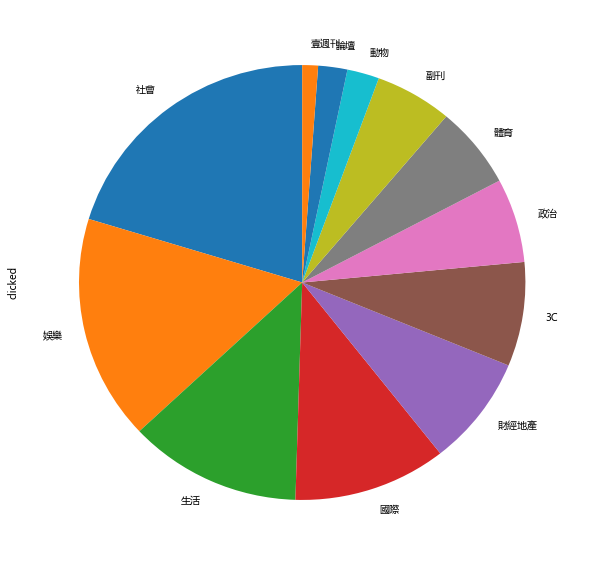

In [193]:
% pylab inline
df = newsdf.groupby(['category'])['clicked'].mean().sort_values(ascending = False)
df.plot(kind='pie', figsize=[10,10], startangle = 90)

In [194]:
df2 = pandas.read_excel('news.xlsx')

In [195]:
df2.head(3)

,category,clicked,dt,summary,title
0,生活,0,2018-01-08 15:06:00,依據中央氣象局天氣預報，直到12日全台幾乎壟罩在寒流的低溫中，彰化縣農業處表示10度以下低溫...,蛋雞防寒 飼料加沙拉油
1,國際,0,2018-01-08 15:06:00,英國每年丟棄25億個拋棄式咖啡紙杯，對環境的衝擊不容小覷。英國國會環境稽查委員會上周提案，應...,年棄25億個咖啡紙杯 英國會提案收費10元
2,財經地產,6,2018-01-08 15:00:00,根據TrendForce旗下拓墣產業研究院數據顯示，2017年全球VR裝置出貨達到370萬台...,微軟MR頭盔今年估賣40萬台 增3成


## 使用Pandas

In [153]:
a= {'a': 1, 'b': 2, 'c':30}
b= {'a': 1, 'c':'qoo'}
ary = [a, b]

import pandas
df = pandas.DataFrame(ary)
df

,a,b,c
0,1,2.0,30
1,1,NaN,qoo
